# GROUP 6

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tcp-connection.csv')

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


In [1]:
# Preprocessing

In [4]:
df.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [6]:
#Feature reduction

<AxesSubplot:>

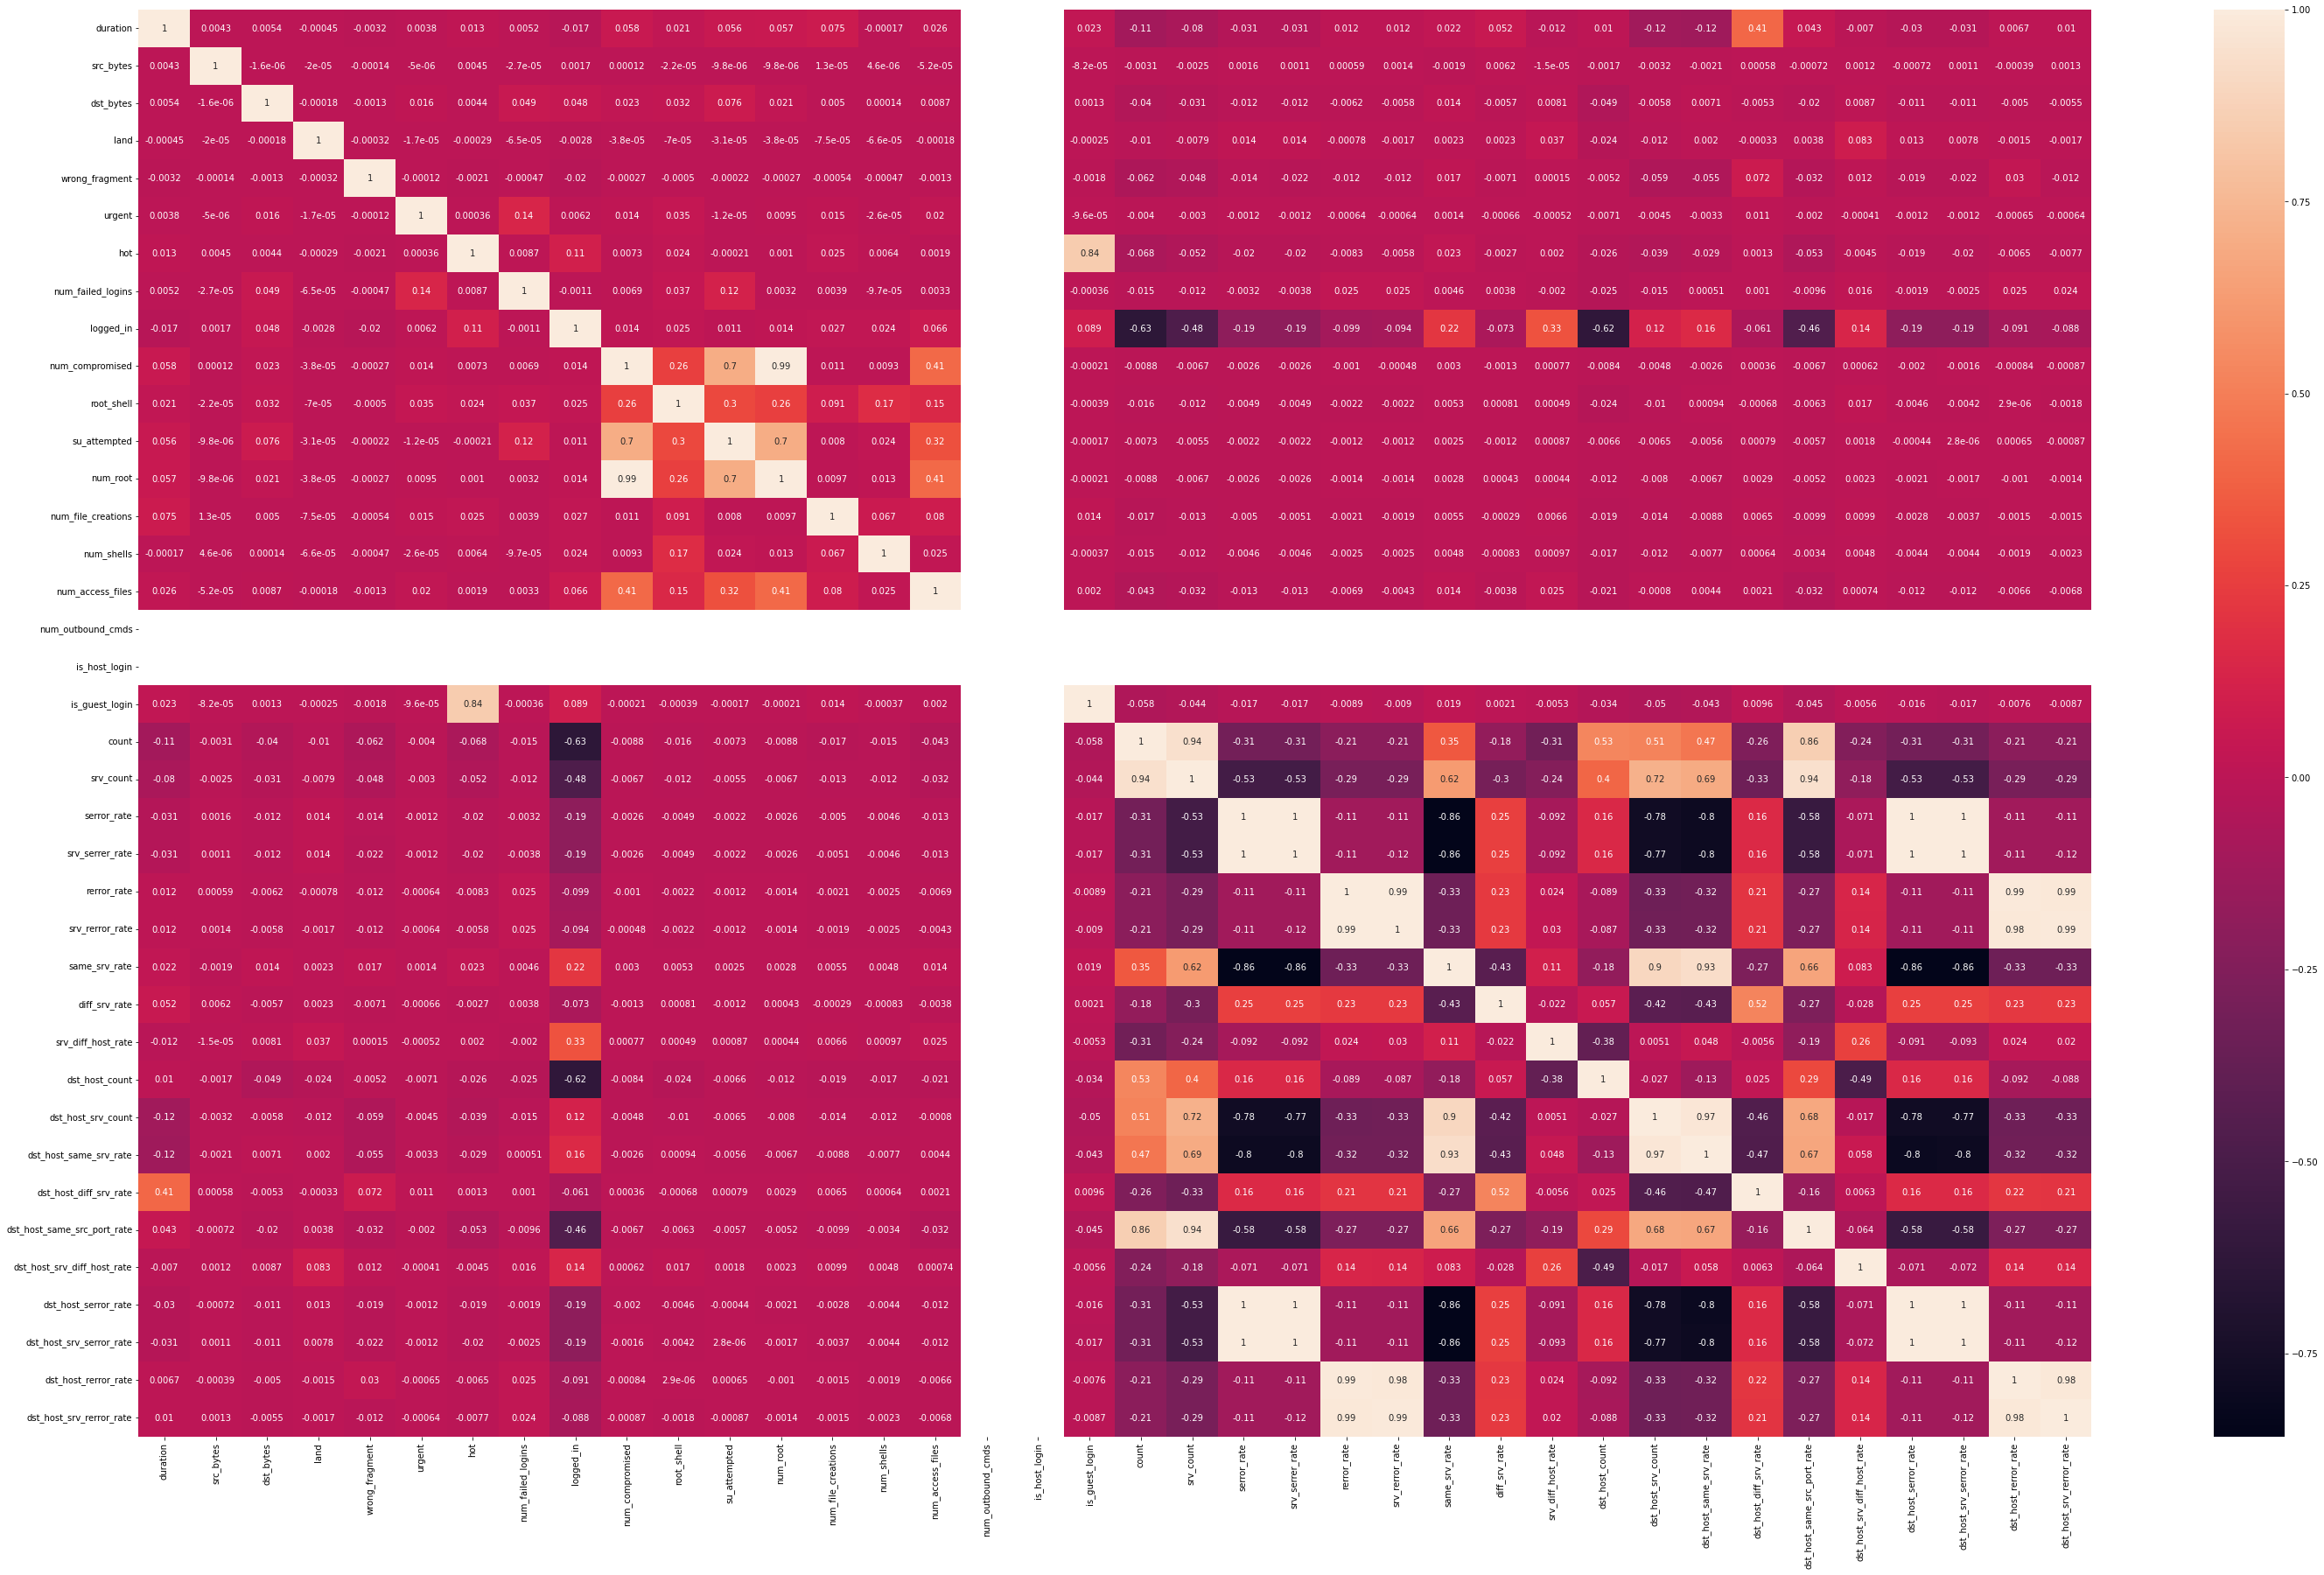

In [7]:
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)

1. Since 'serror_rate','srv_serrer_rate','dst_host_srv_serror_rate' and 'dst_host_serror_rate'
 are highly correlated with each other so we remove the columns 'serror_rate','srv_serrer_rate'and'dst_host_srv_serror_rate'
 
2. Since 'rerror_rate','srv_rerror_rate','dst_host_srv_rerror_rate' and 'dst_host_rerror_rate'  are highly correlated with each other so we remove the columns 'rerror_rate','srv_rerror_rate'and'dst_host_srv_rerror_rate' 

3. Since 'same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate' are highly correlated we remove      'same_srv_rate','dst_host_srv_count'

4. Since 'num_outbound_cmds'and 'is_host_login' oesnot produce any numerical value in the correlation these variables are removed

In [8]:
n_df=df.drop(['serror_rate','srv_serrer_rate','dst_host_srv_serror_rate','rerror_rate','srv_rerror_rate','dst_host_srv_rerror_rate','same_srv_rate','dst_host_srv_count','num_outbound_cmds','is_host_login'],axis=1)

In [9]:
#Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [11]:
a=['protocol_type']
for i in np.arange(len(a)):
    n_df[a[i]]=label_en.fit_transform(n_df[a[i]])

In [12]:
a=['service']
for i in np.arange(len(a)):
    n_df[a[i]]=label_en.fit_transform(n_df[a[i]])

In [13]:
a=['flag']
for i in np.arange(len(a)):
    n_df[a[i]]=label_en.fit_transform(n_df[a[i]])

In [14]:
n_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_rerror_rate,intrusion
0,0,2,11,9,44,134,0,0,0,0,...,0.00,0.01,139,0.64,0.01,0.01,0.00,0.0,0.0,b'normal.'
1,0,1,50,9,1489,385,0,0,0,0,...,0.00,1.00,5,1.00,0.00,0.20,0.02,0.0,0.0,b'normal.'
2,0,0,14,9,1032,0,0,0,0,0,...,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,0.0,b'smurf.'
3,0,0,14,9,1032,0,0,0,0,0,...,0.00,0.00,255,1.00,0.00,1.00,0.00,0.0,0.0,b'smurf.'
4,0,1,45,5,0,0,0,0,0,0,...,0.07,0.00,255,0.02,0.07,0.00,0.00,1.0,0.0,b'neptune.'


In [15]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  int32  
 2   service                      494021 non-null  int32  
 3   flag                         494021 non-null  int32  
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [16]:
#Splitting the dataset

In [17]:
X=n_df.drop(['intrusion'],axis=1)

In [18]:
y=n_df['intrusion']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)

In [20]:
#Standardising the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
X_train

array([[-0.06771015, -0.81159993, -0.69496748, ..., -0.15873355,
        -0.46421722, -0.25229145],
       [-0.06771015, -0.81159993, -0.69496748, ..., -0.15873355,
        -0.46421722, -0.25229145],
       [-0.06771015, -0.81159993, -0.69496748, ..., -0.15873355,
        -0.46421722, -0.25229145],
       ...,
       [-0.06771015, -0.81159993, -0.69496748, ..., -0.15873355,
        -0.46421722, -0.25229145],
       [-0.06771015,  0.92551902, -0.10408405, ...,  0.7926615 ,
        -0.46421722, -0.25229145],
       [-0.06771015, -0.81159993, -0.69496748, ..., -0.15873355,
        -0.46421722, -0.25229145]])

In [23]:
#Naive Bayes Algorithm

In [24]:
from sklearn.naive_bayes import GaussianNB
cf= GaussianNB()
cf.fit(X_train,y_train)

GaussianNB()

In [25]:
y_pred=cf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [27]:
accuracy_score(y_pred,y_test)

0.19907899397803755

In [28]:
from sklearn.naive_bayes import BernoulliNB
cf=BernoulliNB()
cf.fit(X_train,y_train)

BernoulliNB()

In [29]:
y_pred1=cf.predict(X_test)

In [30]:
accuracy_score(y_pred1,y_test)

0.9933809017762258

Bernoulli Classifier better fits the model with high accuracy score